# Notebook for comparison beween  Gevolution and class and agreement between class and hi-class

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from pylab import rcParams
tableau12 = [(0, 0, 0), (50, 0, 0), (0, 50, 0), (0, 0, 50),    
             (0, 50, 50), (50, 50, 0), (50, 0, 50), (50, 50, 50),    
             (100, 50, 50), (50, 100, 50), (50, 50, 100), (100, 100, 100)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau12)):    
    r, g, b = tableau12[i]    
    tableau12[i] = (r / 255., g / 255., b / 255.) 
    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)
# plt.style.available
plt.rcParams.update(plt.rcParamsDefault)

# plt.style.use('seaborn-paper')
plt.rcParams['font.serif'] = 'Ubuntu'

In [2]:
# Class_Bg_newt_cs_e3=np.loadtxt("./Class_results/class_cs_e3_newt/class_kess_cs_e3_newt_background.dat")
# Linear kessence Gevolution files for pi_k
# address="./ela_12March2018/output/"
#class powerspectra
class_newt_z100=np.loadtxt("./Class_hiclass_results/class_kess_cs_e3_newt/class_kess_cs_e3_newt_z1_tk.dat")
hiclass_z100=np.loadtxt("./Class_hiclass_results/hiclass_cs_e3_Info/kessence_Allhiclass_cs_e3_z100.dat")
class_sync_z100=np.loadtxt("./Class_hiclass_results/class_kess_cs_e3_synch/class_kess_cs_e3_synch_z1_tk.dat")

#z=0
class_newt_z0=np.loadtxt("./Class_hiclass_results/class_kess_cs_e3_newt/class_kess_cs_e3_newt_z4_tk.dat")
hiclass_z0=np.loadtxt("./Class_hiclass_results/hiclass_cs_e3_Info/kessence_Allhiclass_cs_e3_z0.dat")
class_sync_z0=np.loadtxt("./Class_hiclass_results/class_kess_cs_e3_synch/class_kess_cs_e3_synch_z4_tk.dat")


# pi_prime comparison Class_Newt-Class_Synch-Hiclass-!

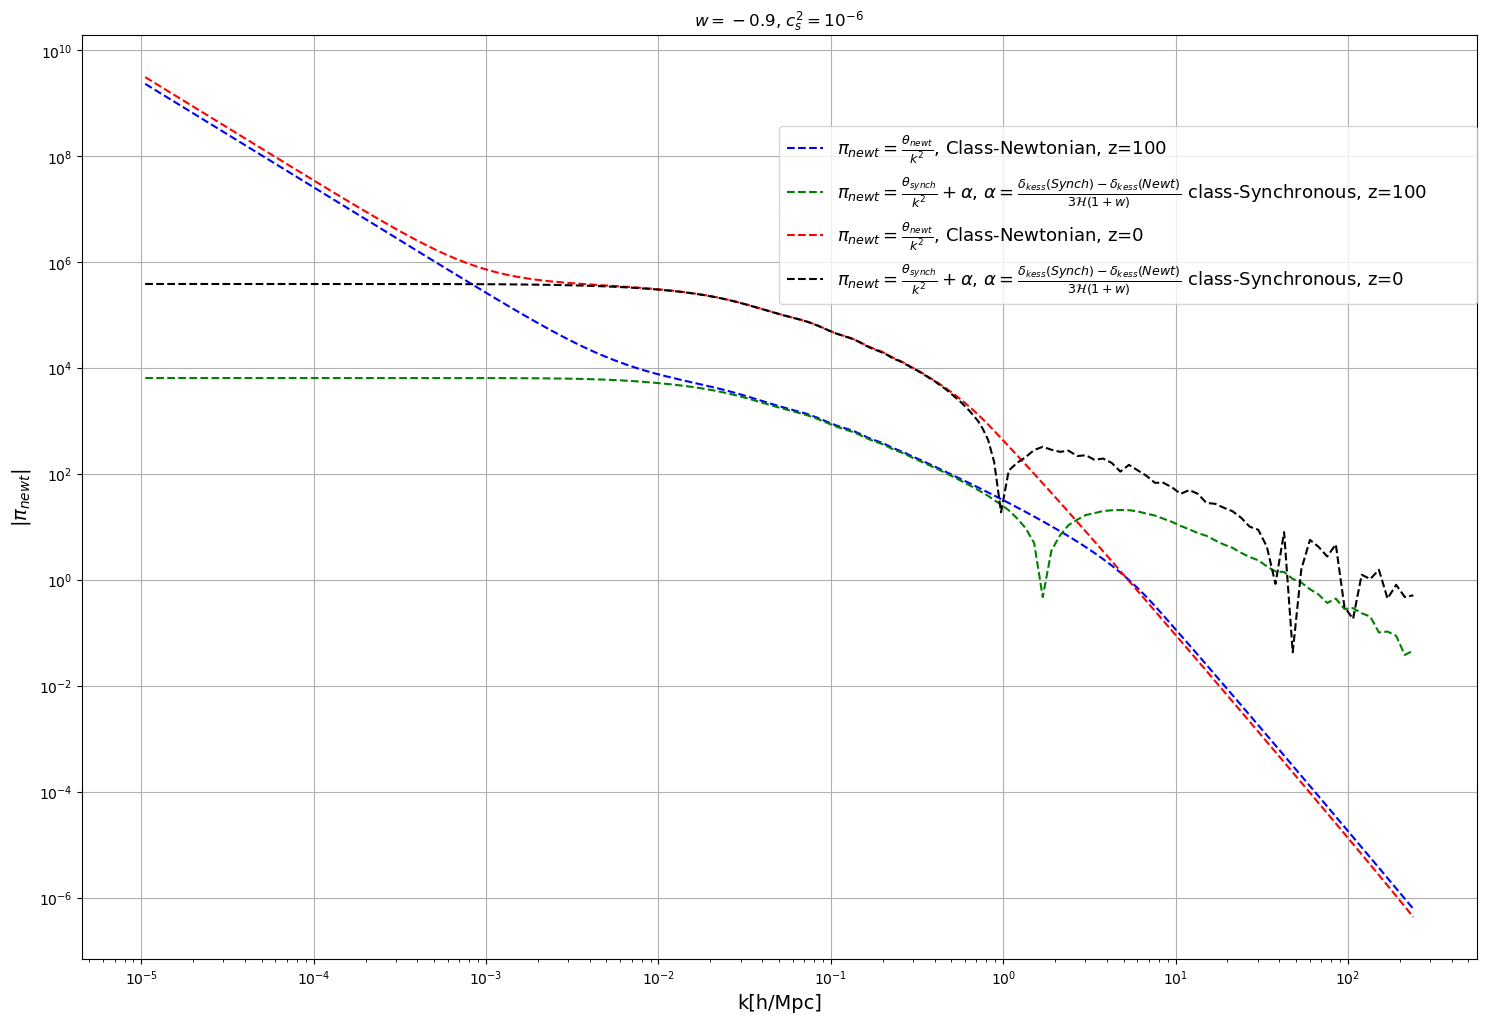

In [4]:
# params for makin power dimensionless
# H_0 in Gevilution unit.
def Hubble_conf_Mpc(a):
    H0=0.00022593979933110373;w=-0.9;h=0.67556;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0.0;
    Omega_rad=9.16681e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_Lambda+Omega_kessence*(a**(-3*(1+w))))*a
#################################
# pi_newt in class from Newtonian gauge according to: \theta_kess/k^2 in correct units which is negative!
pi_classNewt_cs_e3_newt_z100=(class_newt_z100[:,4]/((class_newt_z100[:,0]*h)**2) );
alpha_class_z100=alpha_class_z100=(class_sync_z100[:,4]-class_newt_z100[:,4])/(3.*(1+w)*Hubble_conf_Mpc(1./(1.+100.)));
pi_classSynch_cs_e3_newt_z100=(class_sync_z100[:,4]/((class_sync_z100[:,0]*h)**2) )+alpha_class_z100[:];

#z=0
pi_classNewt_cs_e3_newt_z0=(class_newt_z0[:,4]/((class_newt_z0[:,0]*h)**2) );
alpha_class_z0=alpha_class_z0=(class_sync_z0[:,4]-class_newt_z0[:,4])/(3.*(1+w)*Hubble_conf_Mpc(1./(1.+0.)));
pi_classSynch_cs_e3_newt_z0=(class_sync_z0[:,4]/((class_sync_z0[:,0]*h)**2) )+alpha_class_z0[:];

#pi_newt in hiclass is \pi_synch + \alpha; The columns in the hiclass file are k,\pi_synch,pi'_synch,alpha,alhpha',psi 
# pi_hiclass_cs_e3_newt=hiclass_z100[:,1]-hiclass_z100[:,3];

#################################
plt.figure(figsize=(18,12))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 6)
plt.figure(1)
#################################

plt.loglog(class_newt_z100[:,0], np.abs(pi_classNewt_cs_e3_newt_z100[:]),color="blue",linestyle='dashed',lw=1.5,label=r"$\pi_{newt}=\frac{\theta_{newt}}{k^2}$, Class-Newtonian, z=100 ")
plt.loglog(class_sync_z100[:,0], np.abs(pi_classSynch_cs_e3_newt_z100[:]),color="green",linestyle='dashed',lw=1.5,label=r"$\pi_{newt}=\frac{\theta_{synch}}{k^2} + \alpha$, $\alpha = \frac{\delta_{kess}(Synch) -\delta_{kess}(Newt) }{3 \mathcal{H} (1+w)}$ class-Synchronous, z=100 ")

#z=0
plt.loglog(class_newt_z0[:,0], np.abs(pi_classNewt_cs_e3_newt_z0[:]),color="red",linestyle='dashed',lw=1.5,label=r"$\pi_{newt}=\frac{\theta_{newt}}{k^2}$, Class-Newtonian, z=0 ")
plt.loglog(class_sync_z0[:,0], np.abs(pi_classSynch_cs_e3_newt_z0[:]),color="black",linestyle='dashed',lw=1.5,label=r"$\pi_{newt}=\frac{\theta_{synch}}{k^2} + \alpha$, $\alpha = \frac{\delta_{kess}(Synch) -\delta_{kess}(Newt) }{3 \mathcal{H} (1+w)}$ class-Synchronous, z=0 ")

#####################
plt.title(r"$w=-0.9$, $c_s^2=10^{-6}$")
plt.legend(bbox_to_anchor=(0.5, 0.80, 0.5, .102), loc=1,ncol=1,fontsize=13, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=14)
plt.ylabel(r"$|\pi_{newt}|$",fontsize=14)
# plt.xlim(0.01,5.e-1)
# plt.ylim(1.e-13,1.e-9)
plt.grid(True)
#################################
#Difference plot!

# plt.savefig('comp_field_class.jpg', format='jpg', dpi=500)
plt.show()



# pi' Hiclass-Class_Newt-Class_Synch

In [ ]:
# pi_prime_class_cs_e3_newt_zlist=(cs2_e3*class_z_all[i][:,3]/(1.+w) + H_confz_list[i]*pi_class_cs_e3_newt*(3.*cs2_e3-1.) + class_z_all[i][:,5]) ;


# Psi comparison hiclass-class

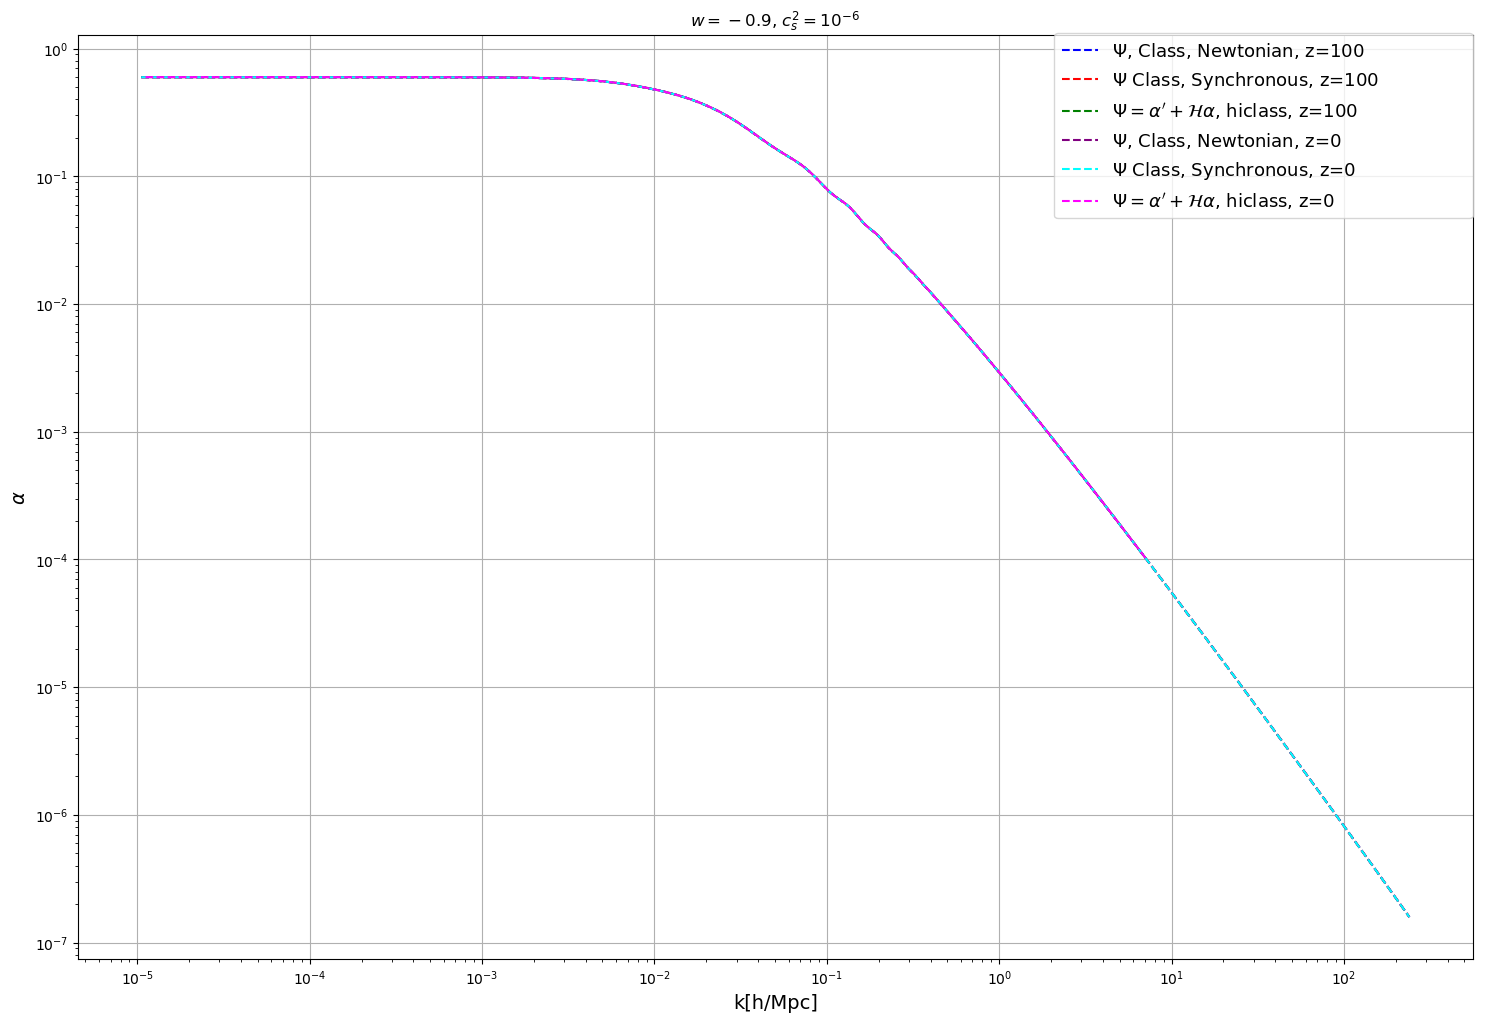

In [64]:
# H_0 in Gevilution unit.
def Hubble_conf_Mpc(a):
    H0=0.00022593979933110373;w=-0.9;h=0.67556;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0.0;
    Omega_rad=9.16681e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_Lambda+Omega_kessence*(a**(-3*(1+w))))*a
w=-0.9;
#################################
#z=100
Psi_newt_class_z100=class_newt_z100[:,8];
Psi_synch_class_z100=class_sync_z100[:,8];
Psi_hiclass_z100_direct=hiclass_z100[:,3]+
# Psi_hiclass_z100_indirect=hiclass_z100[:,3]
#z=0
#################################
plt.figure(figsize=(18,12))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 6)
plt.figure(1)
#################################
plt.loglog(class_newt_z100[:,0], Psi_newt_class_z100[:],color="blue",linestyle='dashed',lw=1.5,label=r"$\Psi$, Class, Newtonian, z=100 ")
plt.loglog(class_sync_z100[:,0], Psi_synch_class_z100[:],color="red",linestyle='dashed',lw=1.5,label=r"$\Psi$ Class, Synchronous, z=100 ")
plt.loglog(hiclass_z100[:,0]/h, Psi_hiclass_z100_direct[:],color="Green",linestyle='dashed',lw=1.5,label=r"$\alpha = }{3 \mathcal{H} (1+w)}$, z=0 ")
# plt.loglog(hiclass_z0[:,0]/h, alpha_hiclass_z0[:],color="Black",linestyle='dashed',lw=1.5,label=r"$\alpha$ hiclass, z=0 ")

#####################
plt.title(r"$w=-0.9$, $c_s^2=10^{-6}$")
plt.legend(bbox_to_anchor=(0.7, 0.90, 0.3, .102), loc=1,ncol=1,fontsize=13, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=14)
plt.ylabel(r"$\alpha$",fontsize=14)
# plt.xlim(0.01,5.e-1)
# plt.ylim(1.e-13,1.e-9)
plt.grid(True)
#################################
#Difference plot!

# plt.savefig('class-hiclass_alpha.jpg', format='jpg', dpi=500)
plt.show()



# Class Consistency checks!

In [5]:
cs2_e3=1.e-6;
cs2_e1=1.e-2;
cs2_e0=1.e0;
w=-0.9;
h=0.67;
As=2.215*10.e-9;
ns=0.96;
kp=0.05/h;
H_confz_list=[Hubble_conf_Mpc(1./(1.+100.)),Hubble_conf_Mpc(1./(1.+10.)),Hubble_conf_Mpc(1./(1.+1.)),Hubble_conf_Mpc(1./(1.+0.))]; # Unit=1/Mpc Hconf=a*H
a_list=[1./(1.+100.),1./(1.+10.),1./(1.+1.),1./(1.+0.)];
z_list=[100,10,1,0]
# According to the formula it is different, maybe because different comsological parameters!
# pi' definition is so sensitive to the exact amount of Hconf_zini!!!
# \pi_conf in Newtonian in class : -(-\theta/k^2) pi here is conformal pi! and there is "-" from the definition of \theta!
#K=1/Mpc and theta itself is in Mpc-1 so pi is in Mpc unit! and the conversion.
i=0;
pi_class_cs_e3_newt=(class_z_all[i][:,4]/((class_z_all[i][:,0]*h)**2) );
#     pi_class_cs_e1_newt_zlist.append(class_cs_e1_newt[i][:,4]/((class_cs_e1_newt[i][:,0]*h)**2));
#     pi_class_cs_e0_newt_zlist.append(class_cs_e0_newt[i][:,4]/((class_cs_e0_newt[i][:,0]*h)**2));
#*********************************
#\pi_v in class
# Psi is Class_newt_z100[:,7] and delta=Class_newt_z100[:,4]
#pi'_conf in class according to the formula: delta_kess= (1+w/cs2)[-Psi + pi' + Hconf * pi (-3cs2 +1)]
pi_prime_class_cs_e3_newt_zlist=(cs2_e3*class_z_all[i][:,3]/(1.+w) + H_confz_list[i]*pi_class_cs_e3_newt*(3.*cs2_e3-1.) + class_z_all[i][:,5]) ;
#     pi_prime_class_cs_e1_newt_zlist.append(cs2_e1*class_cs_e1_newt[i][:,3]/(1.+w) + H_confz_list[i]*pi_class_cs_e1_newt_zlist[i]*(3.*cs2_e1-1.) + class_cs_e1_newt[i][:,5]) ;
#     pi_prime_class_cs_e0_newt_zlist.append(cs2_e0*class_cs_e0_newt[i][:,3]/(1.+w) + H_confz_list[i]*pi_class_cs_e0_newt_zlist[i]*(3.*cs2_e0-1.) + class_cs_e0_newt[i][:,5]) ;

#*********************************

# Some checks!
# We expect that \dot{\pi} + \Psi vanish! which we get \pi'+ H \pi -\Psi, cs=1.e-3;
pidot_zlist=(pi_prime_class_cs_e3_newt_zlist + H_confz_list[i] * pi_class_cs_e3_newt)
Psi_zlist=(class_z_all[i][:,5])
#*********************************

#Plot setting
plt.figure(figsize=(20,20))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

#*******************
#SubplotI Check that the pi and are made correctly with correct H-conf
#     plt.figure(1)
plt.subplot(321)
plt.loglog(class_z_all[i][:,0],class_z_all[i][:,1],color="red",label=r"$\pi$ in the file, $c_s=10^{-3}$, z="+str(z_list[i]))
plt.loglog(class_z_all[i][:,0],pi_class_cs_e3_newt[:],color="blue",label=r"$\pi$, made here by $\theta/k^2$")
plt.loglog(class_z_all[i][:,0],(pi_class_cs_e3_newt[:]-class_z_all[i][:,1]),color="green",label=r"$\pi$ difference")
plt.legend(bbox_to_anchor=(0.05, 0.20, 0.46, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
# plt.yscale('log')
plt.xlabel("k[h/Mpc]",fontsize=11)
plt.ylabel(r"$\pi/\mathcal{R}$",fontsize=11)
# plt.xlim(0.0001,5)
plt.grid(True)

# #     #*******************
# #     #SubplotII Check that the pi' are made correctly with correct H-conf
plt.subplot(322)
plt.semilogx(class_z_all[i][:,0],class_z_all[i][:,2],color="red",label=r"$\pi'$ in the file, $c_s=10^{-3}$, z="+str(z_list[i]))
plt.semilogx(class_z_all[i][:,0],pi_prime_class_cs_e3_newt_zlist[:],color="blue",label=r"$\pi'$ made here by $\pi'_{conf}=\frac{c_s^2}{1+w}\delta + \Psi +\mathcal{H}\pi (3c_s^2-1)$")
plt.semilogx(class_z_all[i][:,0],(pi_prime_class_cs_e3_newt_zlist[:]-class_z_all[i][:,2]),color="green",label=r"$\pi'$ difference")
plt.legend(bbox_to_anchor=(0.05, 0.18, 0.66, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=11)
plt.ylabel(r"$\pi'$",fontsize=11)
plt.grid(True)

# #     #*******************
# #     #SubplotIII Check that the \dot{pi} and \Psi comparison
plt.subplot(323)
plt.loglog(class_z_all[i][:,0],pidot_zlist[:],color="red",label=r"$\pi'+ \mathcal{H} \pi =\dot{\pi}$ in the file")
plt.loglog(class_z_all[i][:,0],Psi_zlist[:],color="blue",label=r"$\Psi$")
plt.loglog(class_z_all[i][:,0],np.abs(pidot_zlist[:]-Psi_zlist[:]),color="green",label=r"$ |\Psi-\dot{\pi}|$")

plt.legend(bbox_to_anchor=(0.00, 0.50, 0.26, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=11)
plt.ylabel(r"$T/{\mathcal{R}}$",fontsize=11)
plt.grid(True)

# #     #*******************
# #     #SubplotIV Check that the pi' + Hconf \pi -psi = pi_dot  -Psi , is  comparable with cs2 k^2/H^2 \Psi!
# #     # For cs->0 these plots should be the same! (pi_dot  -Psi) -> cs2 k^2/H^2 \Psi
plt.subplot(324)
plt.loglog(class_z_all[i][:,0],np.abs(pidot_zlist[:]-Psi_zlist[:]),color="red",label=r"$\pi'+ \mathcal{H} \pi -\Psi$ in the file")
plt.loglog(class_z_all[i][:,0],cs2_e3*(class_z_all[i][:,0]*h/(H_confz_list[i]))**2 * Psi_zlist[:],color="blue",label=r"$ c_s^2 k^2/\mathcal{H}^2 \Psi$")
plt.legend(bbox_to_anchor=(0.25, 0.90, 0.29, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=11)
plt.ylabel(r"$|T/{\mathcal{R}}|$",fontsize=11)
plt.grid(True)


# plt.savefig('Class_1.jpg', format='jpg', dpi=500)
# All subplots adjusting
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                        wspace=0.25)
plt.show()

NameError: name 'class_z_all' is not defined